# Train / Test

Training & Testing a simple model.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn.metrics import r2_score

## Generate Data

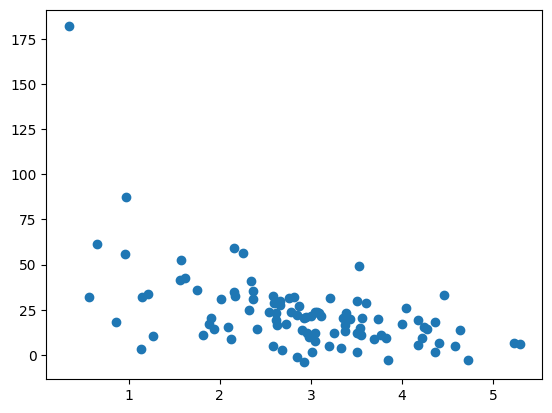

In [2]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds
scatter(pageSpeeds, purchaseAmount)

## Split Data into Training & Testing
- 80% of it will be used for "training"
- 20% for testing it

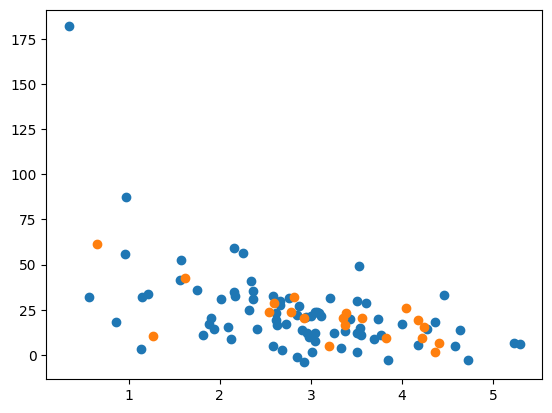

In [3]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

# preview training & Test data
scatter(trainX, trainY)
scatter(testX, testY)

Here, fitting an 8th-degree polynomial to the data (which is almost certainly overfitting)

In [15]:
# build the polynomial line with training data
x = np.array(trainX)
y = np.array(trainY)
thisPoly8 = np.polyfit(x, y, 8)
p4 = np.poly1d(thisPoly8)

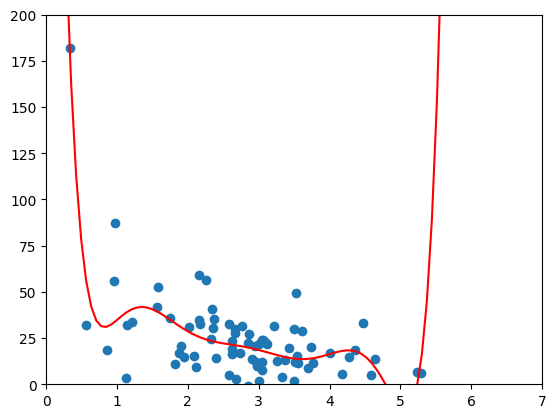

In [16]:

# plot the data AND the polynomial
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

And against our test data:

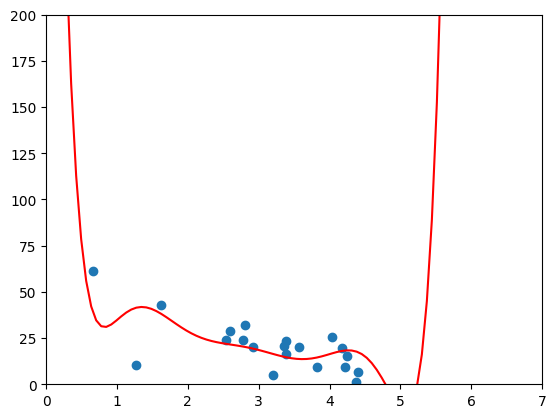

In [17]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [18]:
testR2 = r2_score(testy, p4(testx))

print(f'r2 of Testing: {testR2}')


r2 of Testing: 0.30018168611977913


In [20]:
trainR2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(f'r2 of Training: {r2}')

r2 of Training: 0.6427069514692842


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.